# Pymaceuticals Inc. (Partial Solution)
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

In [7]:
# Generate a summary statistics table consisting of the:
# mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.
# drug_list=[]
# drug_regimen=clean_study_data_complete["Drug Regimen"].unique()
# for x in drug_regimen:
#     drug_regimen_series=pd.Series(drug_regimen)
#     cleaned_drug_regimen=drug_regimen_series.str.strip()
# for y in cleaned_drug_regimen:
#     tumor_volume=clean_study_data_complete.groupby(y)

grouped_dataset=clean_study_data_complete.groupby('Drug Regimen')
# Create the required calculations:
avg_volume=grouped_dataset.mean()["Tumor Volume (mm3)"]
median_volume=grouped_dataset.median()["Tumor Volume (mm3)"]
variance_volume=grouped_dataset.var()["Tumor Volume (mm3)"]
std_volume=grouped_dataset.std()["Tumor Volume (mm3)"]
sem_volume=grouped_dataset.sem()["Tumor Volume (mm3)"]
#Create DataFrame:
volume_df=pd.DataFrame({
    "Average Tumor Volume":avg_volume.round(3),
    "Median Tumor Volume":median_volume.round(3),
    "Variance of Tumor Volume":variance_volume.round(3),
    "Standard Deviation of Tumor Volume":std_volume.round(3),
    "Standard Error of The Mean":sem_volume.round(3),
})
volume_df.head(10)





,Average Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard Error of The Mean
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


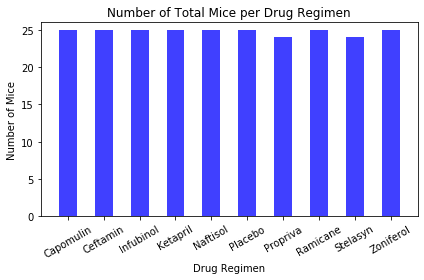

In [8]:
# Using pyplot to create bar graph to show 
# the number of total mice for each treatment regimen throughout the course of the study.
# Create drug list
drug_list=clean_study_data_complete["Drug Regimen"].unique()
drug_list.sort()

# Count the total mice per drug regimen, using nunique to return the total values.
mice_per_drug=clean_study_data_complete.groupby(['Drug Regimen']).nunique()
total_mice=mice_per_drug["Mouse ID"]

# Using pyplot to create bar graph.
x_axis=np.arange(0,len(drug_list))
tick_locations = [x for x in x_axis]

plt.title("Number of Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.xlim(-0.75, len(drug_list)-.25)
plt.ylim(0, max(total_mice) + 1)

plt.bar(x_axis, total_mice, facecolor="blue", alpha=0.75,width=0.5, align="center")
plt.xticks(tick_locations,drug_list,rotation=30)
plt.tight_layout()
plt.show()




In [9]:
# Create a DataFrame with Drug Regimen and Total Mice
mice_per_drug_df=pd.DataFrame(total_mice)
mice_per_drug_df.rename(columns={"Mouse ID":"Total Mice"},inplace=True)
mice_per_drug_df.reset_index()



,Drug Regimen,Total Mice
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


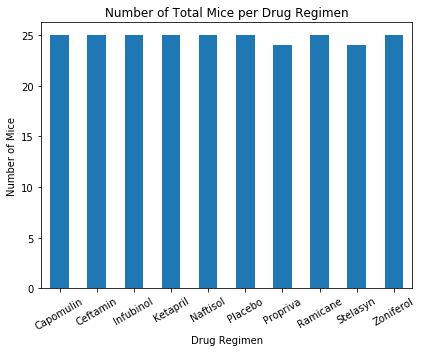

In [10]:
# Using Pandas plot to plot the bar graph
df_plot=mice_per_drug_df.plot(kind='bar',rot=30,legend=False,figsize=(6,5),title="Number of Total Mice per Drug Regimen")
df_plot.set_ylabel('Number of Mice')

plt.tight_layout()
plt.show()



In [12]:
# Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
# that shows the distribution of female or male mice in the study.
# Found the percentage for the male/female:
gender_set=clean_study_data_complete.groupby(['Mouse ID','Sex'])
gender_df=pd.DataFrame(gender_set.size())

gender_count=pd.DataFrame(gender_set.size())

gender_demo=pd.DataFrame(gender_count.groupby(['Sex']).count())
gender_demo.columns=["Total Count"]

gender_percentage=(gender_demo['Total Count']/gender_demo['Total Count'].sum())*100
gender_demo['Percentage of Sex']=gender_percentage.round(3)
gender_demo


,Total Count,Percentage of Sex
Sex,,
Female,123,49.597
Male,125,50.403


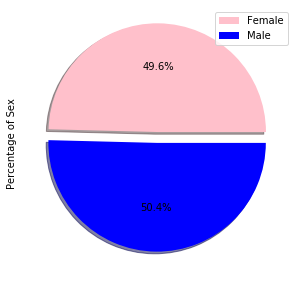

In [13]:
# Using Pandas to plot pie chart
gender_demo.plot.pie(y='Percentage of Sex',figsize=(5,5),legend=True,labels=None,colors=('pink','blue'),startangle=0, shadow = True, autopct="%1.1f%%",explode=(0.1,0))









Text(0.5, 1.0, 'Percentage of Sex')

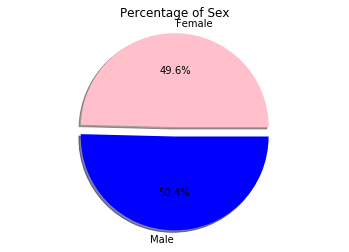

In [27]:
# Using Matplotlib to plot pie chart
labels='Female','Male'
sizes=[49.597,50.403]
colors=['Pink','Blue']
explode=[0.1,0]
plt.pie(sizes, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=0,center=(0, 0),labels=labels)
plt.axis("equal")
plt.title("Percentage of Sex")





In [251]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
# best_drug=study_data_complete.loc[study_data_complete["Drug Regimen"] == ("Capomulin","Ramicane","Infubinol","Ceftamin")]
# I think I hardcoded this section.
# drug_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]
# tumor_volume=[]
# for x in drug_list:
#     combined_df=clean_study_data_complete[clean_study_data_complete['Drug Regimen'].isin([x])]
#     ca_sorted_df=combined_df.sort_values(['Timepoint'],ascending=True)
#     ca_sorted_data=ca_sorted_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#     last_tumor=ca_sorted_data['Tumor Volume (mm3)'].tail(1)
#     ca_quartiles = ca_sorted_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
#     ca_lowerq = ca_quartiles[0.25]
#     ca_upperq = ca_quartiles[0.75]
#     ca_iqr = ca_upperq-ca_lowerq
#     tumor_volume.append(last_tumor)



# combined_df=clean_study_data_complete[clean_study_data_complete['Drug Regimen'].isin(["Ramicane"])]
# ra_sorted_df=combined_df.sort_values(['Timepoint'],ascending=True)
# ra_sorted_data=ra_sorted_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
# ra_quartiles = ra_sorted_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
# ra_lowerq = ra_quartiles[0.25]
# ra_upperq = ra_quartiles[0.75]
# ra_iqr = ra_upperq-ra_lowerq


# combined_df=clean_study_data_complete[clean_study_data_complete['Drug Regimen'].isin(["Infubinol"])]
# in_sorted_df=combined_df.sort_values(['Timepoint'],ascending=True)
# in_sorted_data=in_sorted_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
# in_quartiles = in_sorted_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
# in_lowerq = in_quartiles[0.25]
# in_upperq = in_quartiles[0.75]
# in_iqr = in_upperq-in_lowerq

# combined_df=clean_study_data_complete[clean_study_data_complete['Drug Regimen'].isin(["Ceftamin"])]
# ce_sorted_df=combined_df.sort_values(['Timepoint'],ascending=True)
# ce_sorted_data=ce_sorted_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
# ce_quartiles = ce_sorted_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
# ce_lowerq = ce_quartiles[0.25]
# ce_upperq = ce_quartiles[0.75]
# ce_iqr = ce_upperq-ce_lowerq


# drug_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]


drug_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]
tumor_volume=[]
upper_quart=[]
lower_quart=[]
iqr_list=[]
for x in drug_list:
    combined_df=clean_study_data_complete[clean_study_data_complete['Drug Regimen'].isin([x])]
    sorted_df=combined_df.sort_values(['Timepoint'],ascending=True)
    sorted_data=sorted_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
    last_tumor=sorted_data['Tumor Volume (mm3)'].iloc[-1]
    quartiles = sorted_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    tumor_volume.append(last_tumor)
    upper_quart.append(upperq)
    lower_quart.append(lowerq)
    iqr_list.append(iqr)

final_sts=pd.DataFrame()
final_sts['Drug Regimen']=drug_list
final_sts['Final Tumor Volume']=tumor_volume
final_sts['Upper Quartile']=upper_quart
final_sts['Lower Quartile']=lower_quart
final_sts['IQR']=iqr_list
final_sts.set_index('Drug Regimen')










,Final Tumor Volume,Upper Quartile,Lower Quartile,IQR
Drug Regimen,,,,
Capomulin,31.023923,45.000000,37.685933,7.314067
Ramicane,33.562402,45.000000,36.674635,8.325365
Infubinol,60.918767,57.314444,47.312353,10.002091
Ceftamin,61.433892,56.801438,47.208427,9.593010


In [ ]:
# best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
# best_regimens_sort.head()

# # Turn retrieved data into dataframe to easily manipulate
# best_regimen_df = best_regimens_sort.to_frame()
# best_regimen_df

# #Create a list to use as labels and dataframe
# top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# final_df = best_regimen_df.reset_index()
# tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
# tumor_list_df = pd.DataFrame(tumor_lists)
# tumor_list_df = tumor_list_df.reindex(top_4)
# tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
# plt.boxplot(tumor_vols, labels=top_4)
# plt.ylim(10, 80)
# plt.show()
